In [139]:
import cv2
import numpy as np
import pandas as pd
from pdf2image import convert_from_path
from PIL import Image
from matplotlib import pyplot as plt
import pytesseract


In [6]:
image = np.concatenate(tuple(convert_from_path('Invoice1.pdf',dpi=200)))
image, image.shape
# image = np.array(convert_from_path('Invoice1.pdf')[0])
# image, image.shape

(array([[[255, 255, 255],
         [255, 255, 255],
         [ 13, 131, 221],
         ...,
         [ 13, 131, 221],
         [ 13, 131, 221],
         [ 13, 131, 221]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [ 13, 131, 221],
         ...,
         [ 13, 131, 221],
         [ 13, 131, 221],
         [ 13, 131, 221]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [ 13, 131, 221],
         ...,
         [ 13, 131, 221],
         [ 13, 131, 221],
         [ 13, 131, 221]],
 
        ...,
 
        [[255, 255, 255],
         [ 13, 131, 221],
         [ 13, 131, 221],
         ...,
         [ 13, 131, 221],
         [ 13, 131, 221],
         [ 13, 131, 221]],
 
        [[255, 255, 255],
         [ 13, 131, 221],
         [ 13, 131, 221],
         ...,
         [ 13, 131, 221],
         [ 13, 131, 221],
         [ 13, 131, 221]],
 
        [[255, 255, 255],
         [ 13, 131, 221],
         [ 13, 131, 221],
         ...,
         [ 13, 131, 221],
  

In [7]:
def display(im_data):
    dpi = 200

    height, width  = im_data.shape[:2]
    
    # What size does the figure need to be in inches to fit the image?
    figsize = width / float(dpi), height / float(dpi)

    # Create a figure of the right size with one axes that takes up the full figure
    fig = plt.figure(figsize=figsize)
    ax = fig.add_axes([0, 0, 1, 1])

    # Hide spines, ticks, etc.
    ax.axis('off')

    # Display the image.
    ax.imshow(im_data, cmap='gray')

    plt.show()

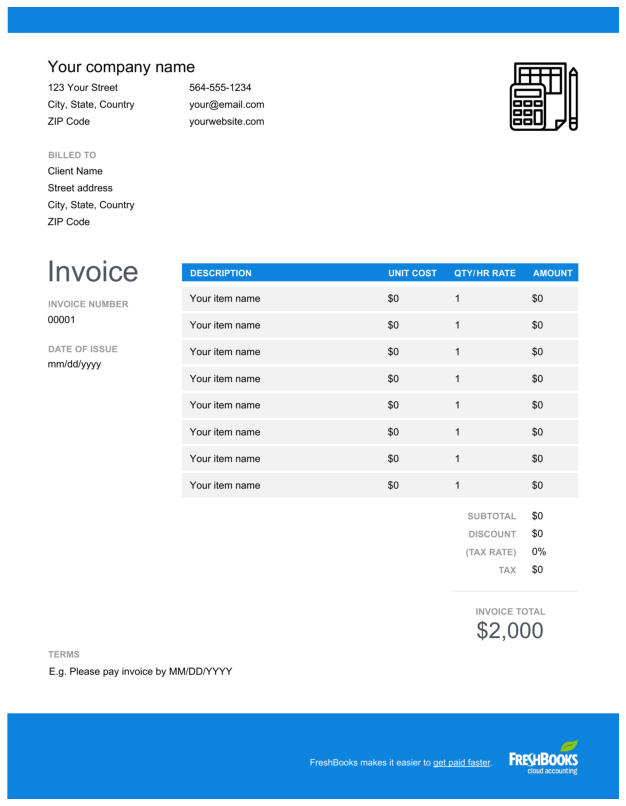

In [8]:
display(image)

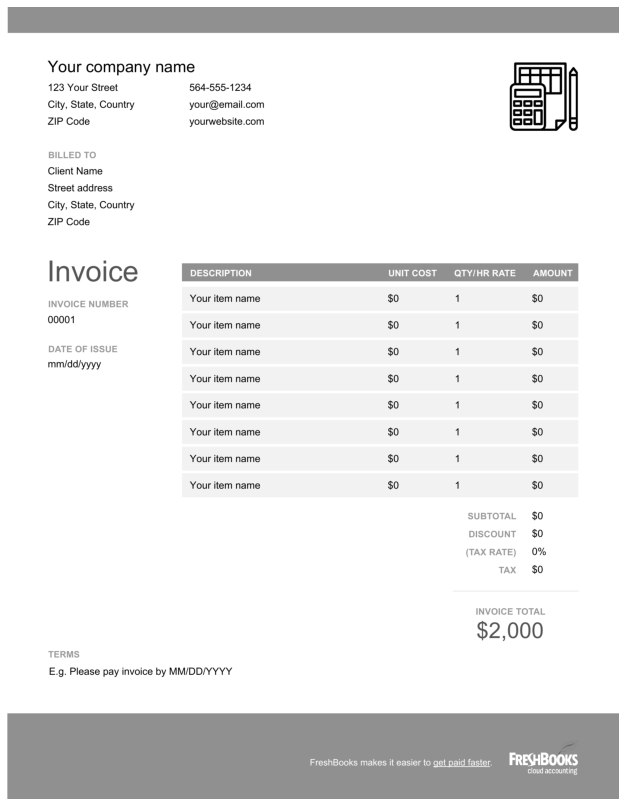

In [9]:
# Binarization
def grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray_image = grayscale(image)
display(gray_image)

In [28]:
from pytesseract import Output
ocr_data = pytesseract.image_to_data(gray_image, output_type=Output.DICT)

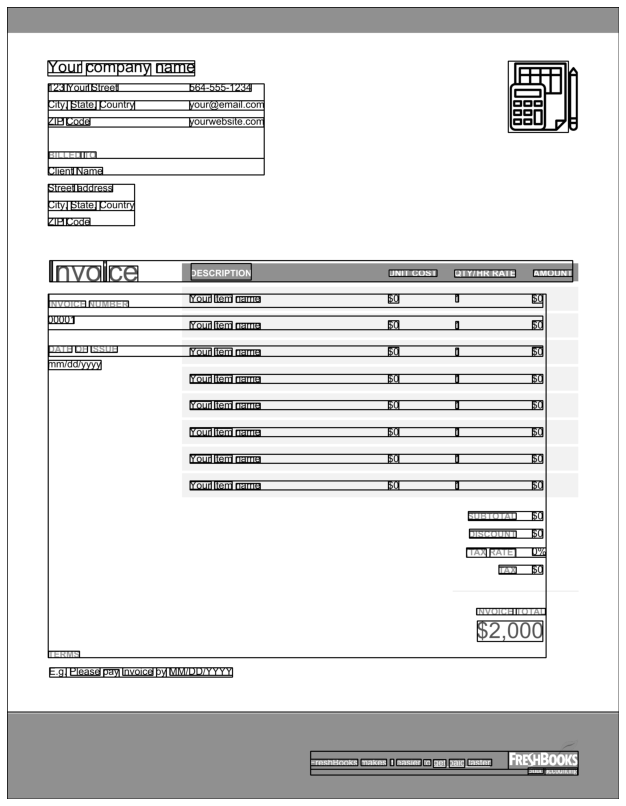

In [11]:
n_boxes = len(ocr_data['level'])
boxed_image = gray_image.copy()

for i in range(n_boxes):
    (x, y, w, h) = (ocr_data['left'][i], ocr_data['top'][i], ocr_data['width'][i], ocr_data['height'][i])    
    boxed_image = cv2.rectangle(boxed_image, (x, y), (x + w, y + h), (0, 0, 255), 2)

display(boxed_image)

In [21]:
print(pytesseract.image_to_boxes(gray_image))

Y 113 2019 142 2051 0
o 143 2018 165 2043 0
u 170 2018 189 2042 0
r 195 2019 207 2043 0
c 220 2018 264 2043 0
o 254 2009 276 2043 0
m 269 2019 300 2043 0
p 306 2010 326 2043 0
a 329 2018 351 2043 0
n 355 2019 374 2043 0
y 378 2009 399 2042 0
n 415 2019 434 2043 0
a 437 2018 459 2043 0
m 464 2019 495 2043 0
e 499 2018 521 2043 0
~ 1392 1852 1559 2050 0
1 116 1967 124 1987 0
2 129 1967 143 1987 0
3 145 1966 158 1987 0
Y 167 1967 185 1987 0
o 186 1966 200 1982 0
u 194 1966 209 1987 0
r 203 1966 226 1982 0
S 235 1966 251 1987 0
t 252 1967 260 1986 0
r 262 1967 270 1982 0
e 270 1966 284 1982 0
e 286 1966 299 1982 0
t 300 1967 308 1986 0
5 508 1966 521 1987 0
6 523 1966 536 1987 0
4 537 1967 552 1987 0
- 553 1973 561 1976 0
5 563 1966 577 1987 0
5 579 1966 592 1987 0
5 594 1966 608 1987 0
- 609 1973 617 1976 0
1 620 1967 628 1987 0
2 634 1967 647 1987 0
3 650 1966 663 1987 0
4 664 1967 678 1987 0
C 114 1919 132 1940 0
i 124 1914 137 1940 0
t 135 1920 147 1940 0
y 148 1914 161 1935 0
, 163 19

In [33]:
print(pytesseract.image_to_data(gray_image))

level	page_num	block_num	par_num	line_num	word_num	left	top	width	height	conf	text
1	1	0	0	0	0	0	0	1700	2200	-1	
2	1	1	0	0	0	113	149	408	42	-1	
3	1	1	1	0	0	113	149	408	42	-1	
4	1	1	1	1	0	113	149	408	42	-1	
5	1	1	1	1	1	113	149	94	33	96.683273	Your
5	1	1	1	1	2	220	157	179	34	96.394203	company
5	1	1	1	1	3	415	157	106	25	96.454224	name
2	1	2	0	0	0	1392	150	167	198	-1	
3	1	2	1	0	0	1392	150	167	198	-1	
4	1	2	1	1	0	1392	150	167	198	-1	
5	1	2	1	1	1	1392	150	167	198	95.000000	 
2	1	3	0	0	0	114	213	600	253	-1	
3	1	3	1	0	0	114	213	600	207	-1	
4	1	3	1	1	0	116	213	562	21	-1	
5	1	3	1	1	1	116	213	42	21	96.785225	123
5	1	3	1	1	2	167	213	59	21	95.905823	Your
5	1	3	1	1	3	235	213	73	21	95.905823	Street
5	1	3	1	1	4	508	213	170	21	96.562729	564-555-1234
4	1	3	1	2	0	114	260	600	26	-1	
5	1	3	1	2	1	114	260	53	26	96.793190	City,
5	1	3	1	2	2	178	260	69	24	96.870300	State,
5	1	3	1	2	3	258	260	96	26	96.737579	Country
5	1	3	1	2	4	507	260	207	26	91.263733	your@email.com
4	1	3	1	3	0	114	307	599	26	-1	
5	1	3	1	3	1	11

In [40]:
# import pandas as pd
# ocr_df = pd.DataFrame.from_dict(ocr_data)
# ocr_df

,level,page_num,block_num,par_num,line_num,word_num,left,top,width,height,conf,text
0,1,1,0,0,0,0,0,0,1700,2200,-1,
1,2,1,1,0,0,0,113,149,408,42,-1,
2,3,1,1,1,0,0,113,149,408,42,-1,
3,4,1,1,1,1,0,113,149,408,42,-1,
4,5,1,1,1,1,1,113,149,94,33,96.683273,Your
...,...,...,...,...,...,...,...,...,...,...,...,...
166,5,1,8,1,2,2,1494,2113,90,20,96.085411,accounting
167,2,1,9,0,0,0,0,1958,1700,242,-1,
168,3,1,9,1,0,0,0,1958,1700,242,-1,
169,4,1,9,1,1,0,0,1958,1700,242,-1,


In [53]:
# ocr_df['text'].replace('', np.nan, inplace=True)
# ocr_df = ocr_df.dropna(subset=['text'])
# ocr_df = ocr_df.reset_index(drop=True)
# ocr_df

,level,page_num,block_num,par_num,line_num,word_num,left,top,width,height,conf,text
0,5,1,1,1,1,1,113,149,94,33,96.683273,Your
1,5,1,1,1,1,2,220,157,179,34,96.394203,company
2,5,1,1,1,1,3,415,157,106,25,96.454224,name
3,5,1,2,1,1,1,1392,150,167,198,95.000000,
4,5,1,3,1,1,1,116,213,42,21,96.785225,123
...,...,...,...,...,...,...,...,...,...,...,...,...
114,5,1,8,1,1,7,1228,2089,43,23,96.402512,paid
115,5,1,8,1,1,8,1280,2089,66,18,96.402512,faster.
116,5,1,8,1,1,9,1392,2067,194,50,92.695244,FRESHBOOKS
117,5,1,8,1,2,1,1447,2113,42,16,96.040550,cloud


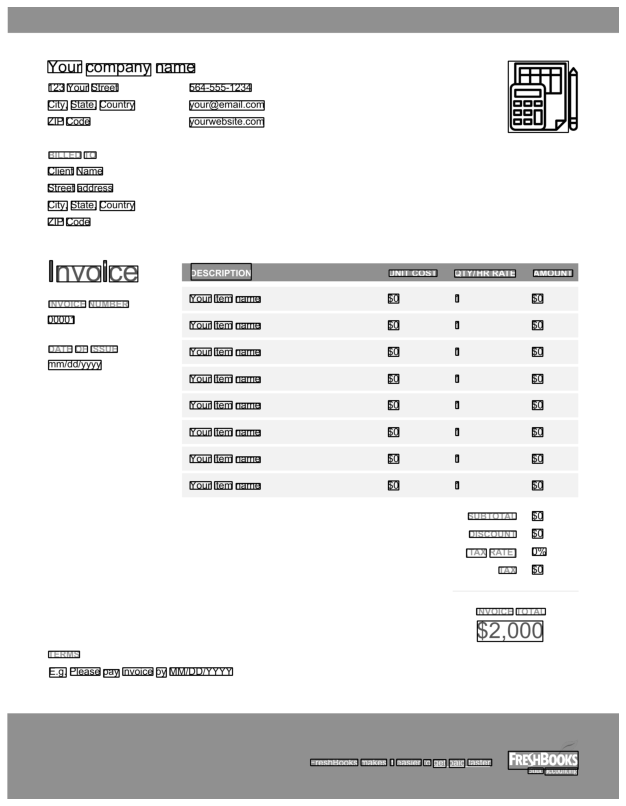

In [55]:
# n_boxes = len(ocr_df['level'])
# boxed_image = gray_image.copy()

# for i in range(n_boxes):
#     (x, y, w, h) = (ocr_df['left'][i], ocr_df['top'][i], ocr_df['width'][i], ocr_df['height'][i])    
#     boxed_image = cv2.rectangle(boxed_image, (x, y), (x + w, y + h), (0, 0, 255), 2)

# display(boxed_image)

In [86]:
def extract_words(img):
    data = pytesseract.image_to_data(img, output_type=Output.DICT)
    n_boxes = len(data['text'])
    words = [
        {
            'text': data['text'][i],
            'left': data['left'][i],
            'top': data['top'][i],
            'right': data['left'][i] + data['width'][i],
            'bottom': data['top'][i] + data['height'][i]
        }
        for i in range(n_boxes) if data['text'][i] 
    ]
    return words

In [87]:
words = extract_words(gray_image)
words

[{'text': 'Your', 'left': 113, 'top': 149, 'right': 207, 'bottom': 182},
 {'text': 'company', 'left': 220, 'top': 157, 'right': 399, 'bottom': 191},
 {'text': 'name', 'left': 415, 'top': 157, 'right': 521, 'bottom': 182},
 {'text': ' ', 'left': 1392, 'top': 150, 'right': 1559, 'bottom': 348},
 {'text': '123', 'left': 116, 'top': 213, 'right': 158, 'bottom': 234},
 {'text': 'Your', 'left': 167, 'top': 213, 'right': 226, 'bottom': 234},
 {'text': 'Street', 'left': 235, 'top': 213, 'right': 308, 'bottom': 234},
 {'text': '564-555-1234',
  'left': 508,
  'top': 213,
  'right': 678,
  'bottom': 234},
 {'text': 'City,', 'left': 114, 'top': 260, 'right': 167, 'bottom': 286},
 {'text': 'State,', 'left': 178, 'top': 260, 'right': 247, 'bottom': 284},
 {'text': 'Country', 'left': 258, 'top': 260, 'right': 354, 'bottom': 286},
 {'text': 'your@email.com',
  'left': 507,
  'top': 260,
  'right': 714,
  'bottom': 286},
 {'text': 'ZIP', 'left': 114, 'top': 307, 'right': 156, 'bottom': 327},
 {'text':

In [115]:
def divide_into_lines(words, height, width):
    cur = words[0]
    lines = []
    line = []
    for word in words:
        if ((word['top'] - cur['top']) / height) > 0.005:
            # if difference between y-coordinate of current word and previous word
            # is more than 0.5% of the height, consider the current word to be in the next line
            lines.append(line)
            line = [word]
        elif ((word['left'] - cur['right']) / width) > 0.01:
            # if difference between x-coordinate of current word and previous word
            # is more than 5% of the width, consider the current word to be in a different line
            lines.append(line)
            line = [word]
        else:
            line.append(word)
        cur = word
    lines.append(line)
    return lines


In [117]:
lines = divide_into_lines(words, 2200, 1700)
lines

[[{'text': 'Your', 'left': 113, 'top': 149, 'right': 207, 'bottom': 182},
  {'text': 'company', 'left': 220, 'top': 157, 'right': 399, 'bottom': 191},
  {'text': 'name', 'left': 415, 'top': 157, 'right': 521, 'bottom': 182}],
 [{'text': ' ', 'left': 1392, 'top': 150, 'right': 1559, 'bottom': 348}],
 [{'text': '123', 'left': 116, 'top': 213, 'right': 158, 'bottom': 234},
  {'text': 'Your', 'left': 167, 'top': 213, 'right': 226, 'bottom': 234},
  {'text': 'Street', 'left': 235, 'top': 213, 'right': 308, 'bottom': 234}],
 [{'text': '564-555-1234',
   'left': 508,
   'top': 213,
   'right': 678,
   'bottom': 234}],
 [{'text': 'City,', 'left': 114, 'top': 260, 'right': 167, 'bottom': 286},
  {'text': 'State,', 'left': 178, 'top': 260, 'right': 247, 'bottom': 284},
  {'text': 'Country', 'left': 258, 'top': 260, 'right': 354, 'bottom': 286}],
 [{'text': 'your@email.com',
   'left': 507,
   'top': 260,
   'right': 714,
   'bottom': 286}],
 [{'text': 'ZIP', 'left': 114, 'top': 307, 'right': 156

In [118]:
boxes = []
for line in lines:
    newd = line[0]
    if len(line)>1:
        newd = dict()
        if newd == {}:
            newd['text'] = ' '.join([d['text'] for d in line])
            newd['left'] = min([d['left'] for d in line])
            newd['top'] = min([d['top'] for d in line])
            newd['right'] = max([d['right'] for d in line])
            newd['bottom'] = max([d['bottom'] for d in line])
    boxes.append(newd)        

In [119]:
boxes

[{'text': 'Your company name',
  'left': 113,
  'top': 149,
  'right': 521,
  'bottom': 191},
 {'text': ' ', 'left': 1392, 'top': 150, 'right': 1559, 'bottom': 348},
 {'text': '123 Your Street',
  'left': 116,
  'top': 213,
  'right': 308,
  'bottom': 234},
 {'text': '564-555-1234',
  'left': 508,
  'top': 213,
  'right': 678,
  'bottom': 234},
 {'text': 'City, State, Country',
  'left': 114,
  'top': 260,
  'right': 354,
  'bottom': 286},
 {'text': 'your@email.com',
  'left': 507,
  'top': 260,
  'right': 714,
  'bottom': 286},
 {'text': 'ZIP Code', 'left': 114, 'top': 307, 'right': 230, 'bottom': 328},
 {'text': 'yourwebsite.com',
  'left': 507,
  'top': 307,
  'right': 713,
  'bottom': 333},
 {'text': 'BILLED TO', 'left': 116, 'top': 402, 'right': 247, 'bottom': 420},
 {'text': 'Client Name', 'left': 114, 'top': 445, 'right': 265, 'bottom': 466},
 {'text': 'Street address',
  'left': 114,
  'top': 492,
  'right': 293,
  'bottom': 513},
 {'text': 'City, State, Country',
  'left': 114

In [134]:
# Filter the wanted boxes
img_h, img_w = gray_image.shape

items = []
prices = []
for d in boxes:
    if d['top']/img_h > 700/2200:
        if d['left']/img_w > 500/1700 and d['right']/img_w < 1000/1700:
            items.append(d['text'])
        elif d['left']/img_w > 1000/1700 and d['right']/img_w < 1200/1700:
            prices.append(d['text'])
    

In [136]:
items

['DESCRIPTION',
 'Your item name',
 'Your item name',
 'Your item name',
 'Your item name',
 'Your item name',
 'Your item name',
 'Your item name',
 'Your item name']

In [137]:
prices

['UNITCOST', '$0', '$0', '$0', '$0', '$0', '$0', '$0', '$0']

In [138]:
product_list = [items[1:], prices[1:]]
ocr_df = pd.DataFrame(product_list).transpose()
ocr_df.columns = [['Description','Unit_Cost']]

print(ocr_df)

      Description Unit_Cost
0  Your item name        $0
1  Your item name        $0
2  Your item name        $0
3  Your item name        $0
4  Your item name        $0
5  Your item name        $0
6  Your item name        $0
7  Your item name        $0


### direct from text + regex (not recommended)

In [27]:
ocr_result = pytesseract.image_to_string(gray_image) #line by line

In [13]:
print(ocr_result)

Your company name

123 Your Street 564-555-1234
City, State, Country your@email.com
ZIP Code yourwebsite.com
BILLED TO

Client Name

Street address
City, State, Country
ZIP Code

| nvo | ce DESCRIPTION UNITCOST QTY/HRRATE AMOUNT

INVOICE NUMBER Your item name $0 1 $0
00001 Your item name $0 1 $0
DATE OF ISSUE Your item name $0 4 $0
mm/dd/yyyy
Your item name $0 4 $0
Your item name $0 4 $0
Your item name $0 4 $0
Your item name $0 4 $0
Your item name $0 4 $0
SUBTOTAL $0
DISCOUNT $0
(TAX RATE) 0%
TAX $0
INVOICE TOTAL
$2,000
TERMS

E.g. Please pay invoice by MM/DD/YYYY

FreshBooks makes it easier to get paid faster. FRESHBOOKS
cloud accounting




### extract subtotal using re

In [14]:
lines = ocr_result.split('\n')
lines = [line.lower() for line in lines]
lines

['your company name',
 '',
 '123 your street 564-555-1234',
 'city, state, country your@email.com',
 'zip code yourwebsite.com',
 'billed to',
 '',
 'client name',
 '',
 'street address',
 'city, state, country',
 'zip code',
 '',
 '| nvo | ce description unitcost qty/hrrate amount',
 '',
 'invoice number your item name $0 1 $0',
 '00001 your item name $0 1 $0',
 'date of issue your item name $0 4 $0',
 'mm/dd/yyyy',
 'your item name $0 4 $0',
 'your item name $0 4 $0',
 'your item name $0 4 $0',
 'your item name $0 4 $0',
 'your item name $0 4 $0',
 'subtotal $0',
 'discount $0',
 '(tax rate) 0%',
 'tax $0',
 'invoice total',
 '$2,000',
 'terms',
 '',
 'e.g. please pay invoice by mm/dd/yyyy',
 '',
 'freshbooks makes it easier to get paid faster. freshbooks',
 'cloud accounting',
 '',
 '']

In [15]:
# import re
# amt_re = re.compile(r'$\d+')

In [16]:
for line in lines:   
    if 'subtotal' in line:
        sub = float(line.split(' ')[-1].replace('$',''))
sub

0.0

### extract table

In [17]:
import pandas as pd
dataset = pd.DataFrame(columns=['Item', 'Price'])

dataset

,Item,Price


In [18]:
for i, line in enumerate(lines):
    print(i,line)

0 your company name
1 
2 123 your street 564-555-1234
3 city, state, country your@email.com
4 zip code yourwebsite.com
5 billed to
6 
7 client name
8 
9 street address
10 city, state, country
11 zip code
12 
13 | nvo | ce description unitcost qty/hrrate amount
14 
15 invoice number your item name $0 1 $0
16 00001 your item name $0 1 $0
17 date of issue your item name $0 4 $0
18 mm/dd/yyyy
19 your item name $0 4 $0
20 your item name $0 4 $0
21 your item name $0 4 $0
22 your item name $0 4 $0
23 your item name $0 4 $0
24 subtotal $0
25 discount $0
26 (tax rate) 0%
27 tax $0
28 invoice total
29 $2,000
30 terms
31 
32 e.g. please pay invoice by mm/dd/yyyy
33 
34 freshbooks makes it easier to get paid faster. freshbooks
35 cloud accounting
36 
37 


In [19]:
for i, line in enumerate(lines):
    if i <= 14:
        continue
    
    if len(line.split(' ')) >= 4 and any(i.isdigit() for i in line):
        line = line.lstrip('0123456789.- ').replace('invoice number ','').replace('date of issue ','')
        line = line.split(' ')
        item_words = line[:-3]
        item = ' '.join(item_words)
        price = line[-1]
        dataset = dataset.append(pd.DataFrame([[item,price]],columns = dataset.columns))

In [20]:
dataset.reset_index(drop=True)

,Item,Price
0,your item name,$0
1,your item name,$0
2,your item name,$0
3,your item name,$0
4,your item name,$0
5,your item name,$0
6,your item name,$0
7,your item name,$0
